Pipelines

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [3]:
pwd = os.getcwd()
filepath = os.path.join(pwd, '/Users/ishabhjain/Downloads/Chapter 2 - housing.csv')
filepath


'/Users/ishabhjain/Downloads/Chapter 2 - housing.csv'

In [4]:
housing_data = pd.read_csv(filepath)
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: ylabel='ocean_proximity'>

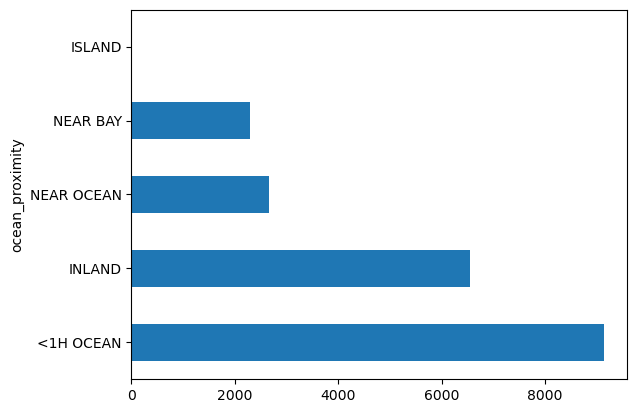

In [6]:
housing_data['ocean_proximity'].value_counts().plot(kind='barh')

In [7]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

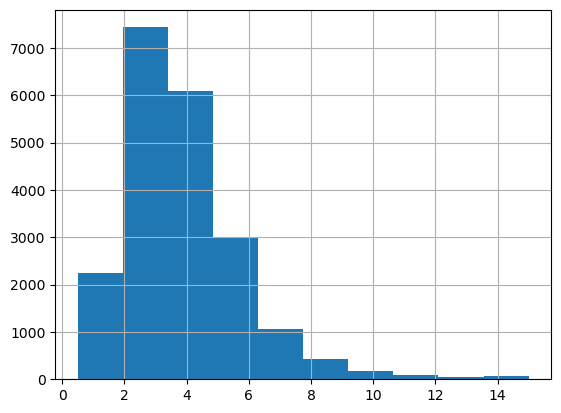

In [8]:
housing_data['median_income'].hist()

In [9]:
housing_data['income_cat'] = pd.cut(housing_data['median_income'], bins=[0.,1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
housing_data['income_cat'].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

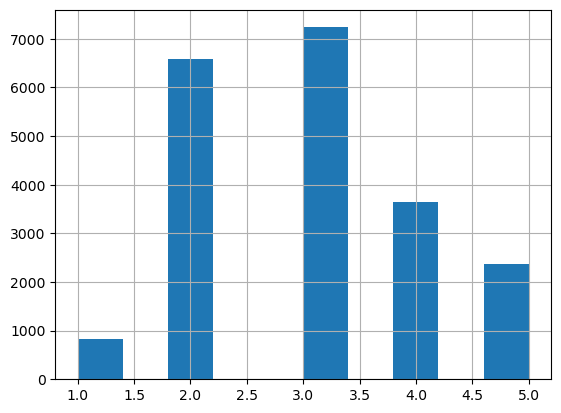

In [10]:
housing_data['income_cat'].hist()

when someone tells you that this particular variable in the data is interesting we have a look at it very quickly.

In [11]:
y = housing_data["median_house_value"]
X = housing_data.drop("median_house_value", axis=1)


y is the value we are predicting using x

#Split Datasets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
5424,-118.42,34.02,21.0,3244.0,815.0,1423.0,781.0,3.6488,<1H OCEAN,3
17196,-119.75,34.44,28.0,1080.0,298.0,524.0,251.0,1.8432,NEAR OCEAN,2
4590,-118.28,34.06,52.0,936.0,454.0,990.0,354.0,1.1122,<1H OCEAN,1
11962,-117.40,34.01,25.0,1858.0,366.0,1311.0,331.0,2.7083,INLAND,2
11042,-117.82,33.81,19.0,2556.0,304.0,822.0,260.0,9.9055,<1H OCEAN,5
...,...,...,...,...,...,...,...,...,...,...
4424,-118.25,34.06,20.0,41.0,17.0,87.0,25.0,1.5491,<1H OCEAN,2
14661,-117.13,32.80,15.0,1606.0,375.0,784.0,342.0,3.7237,NEAR OCEAN,3
2214,-119.85,36.84,12.0,2272.0,304.0,840.0,305.0,8.9669,INLAND,5
14130,-117.09,32.76,10.0,1922.0,577.0,1595.0,545.0,1.5208,NEAR OCEAN,2


<Axes: >

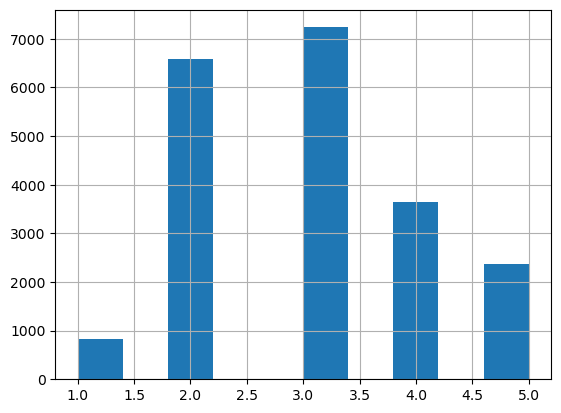

In [13]:
housing_data['income_cat'].hist()

<Axes: >

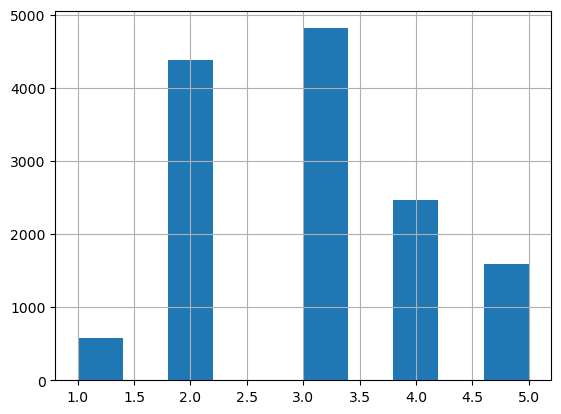

In [14]:
X_train['income_cat'].hist()

Checking whether the training set is having the similar split as that of our original data set

### Stratisfies Split

In case if we don't find the split similar to that of our data set we use stratisfied shuffle split

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

here above we have splited that data using income_cat column

In [16]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [17]:
housing_data['income_cat'].value_counts()/len(housing_data)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

we were checking whether our code is working or not and seems to be fine

In [18]:
strat_train_set.drop('income_cat', axis=1, inplace=True)
strat_test_set.drop('income_cat', axis=1, inplace=True)

# Visualization of Data

Histograms

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

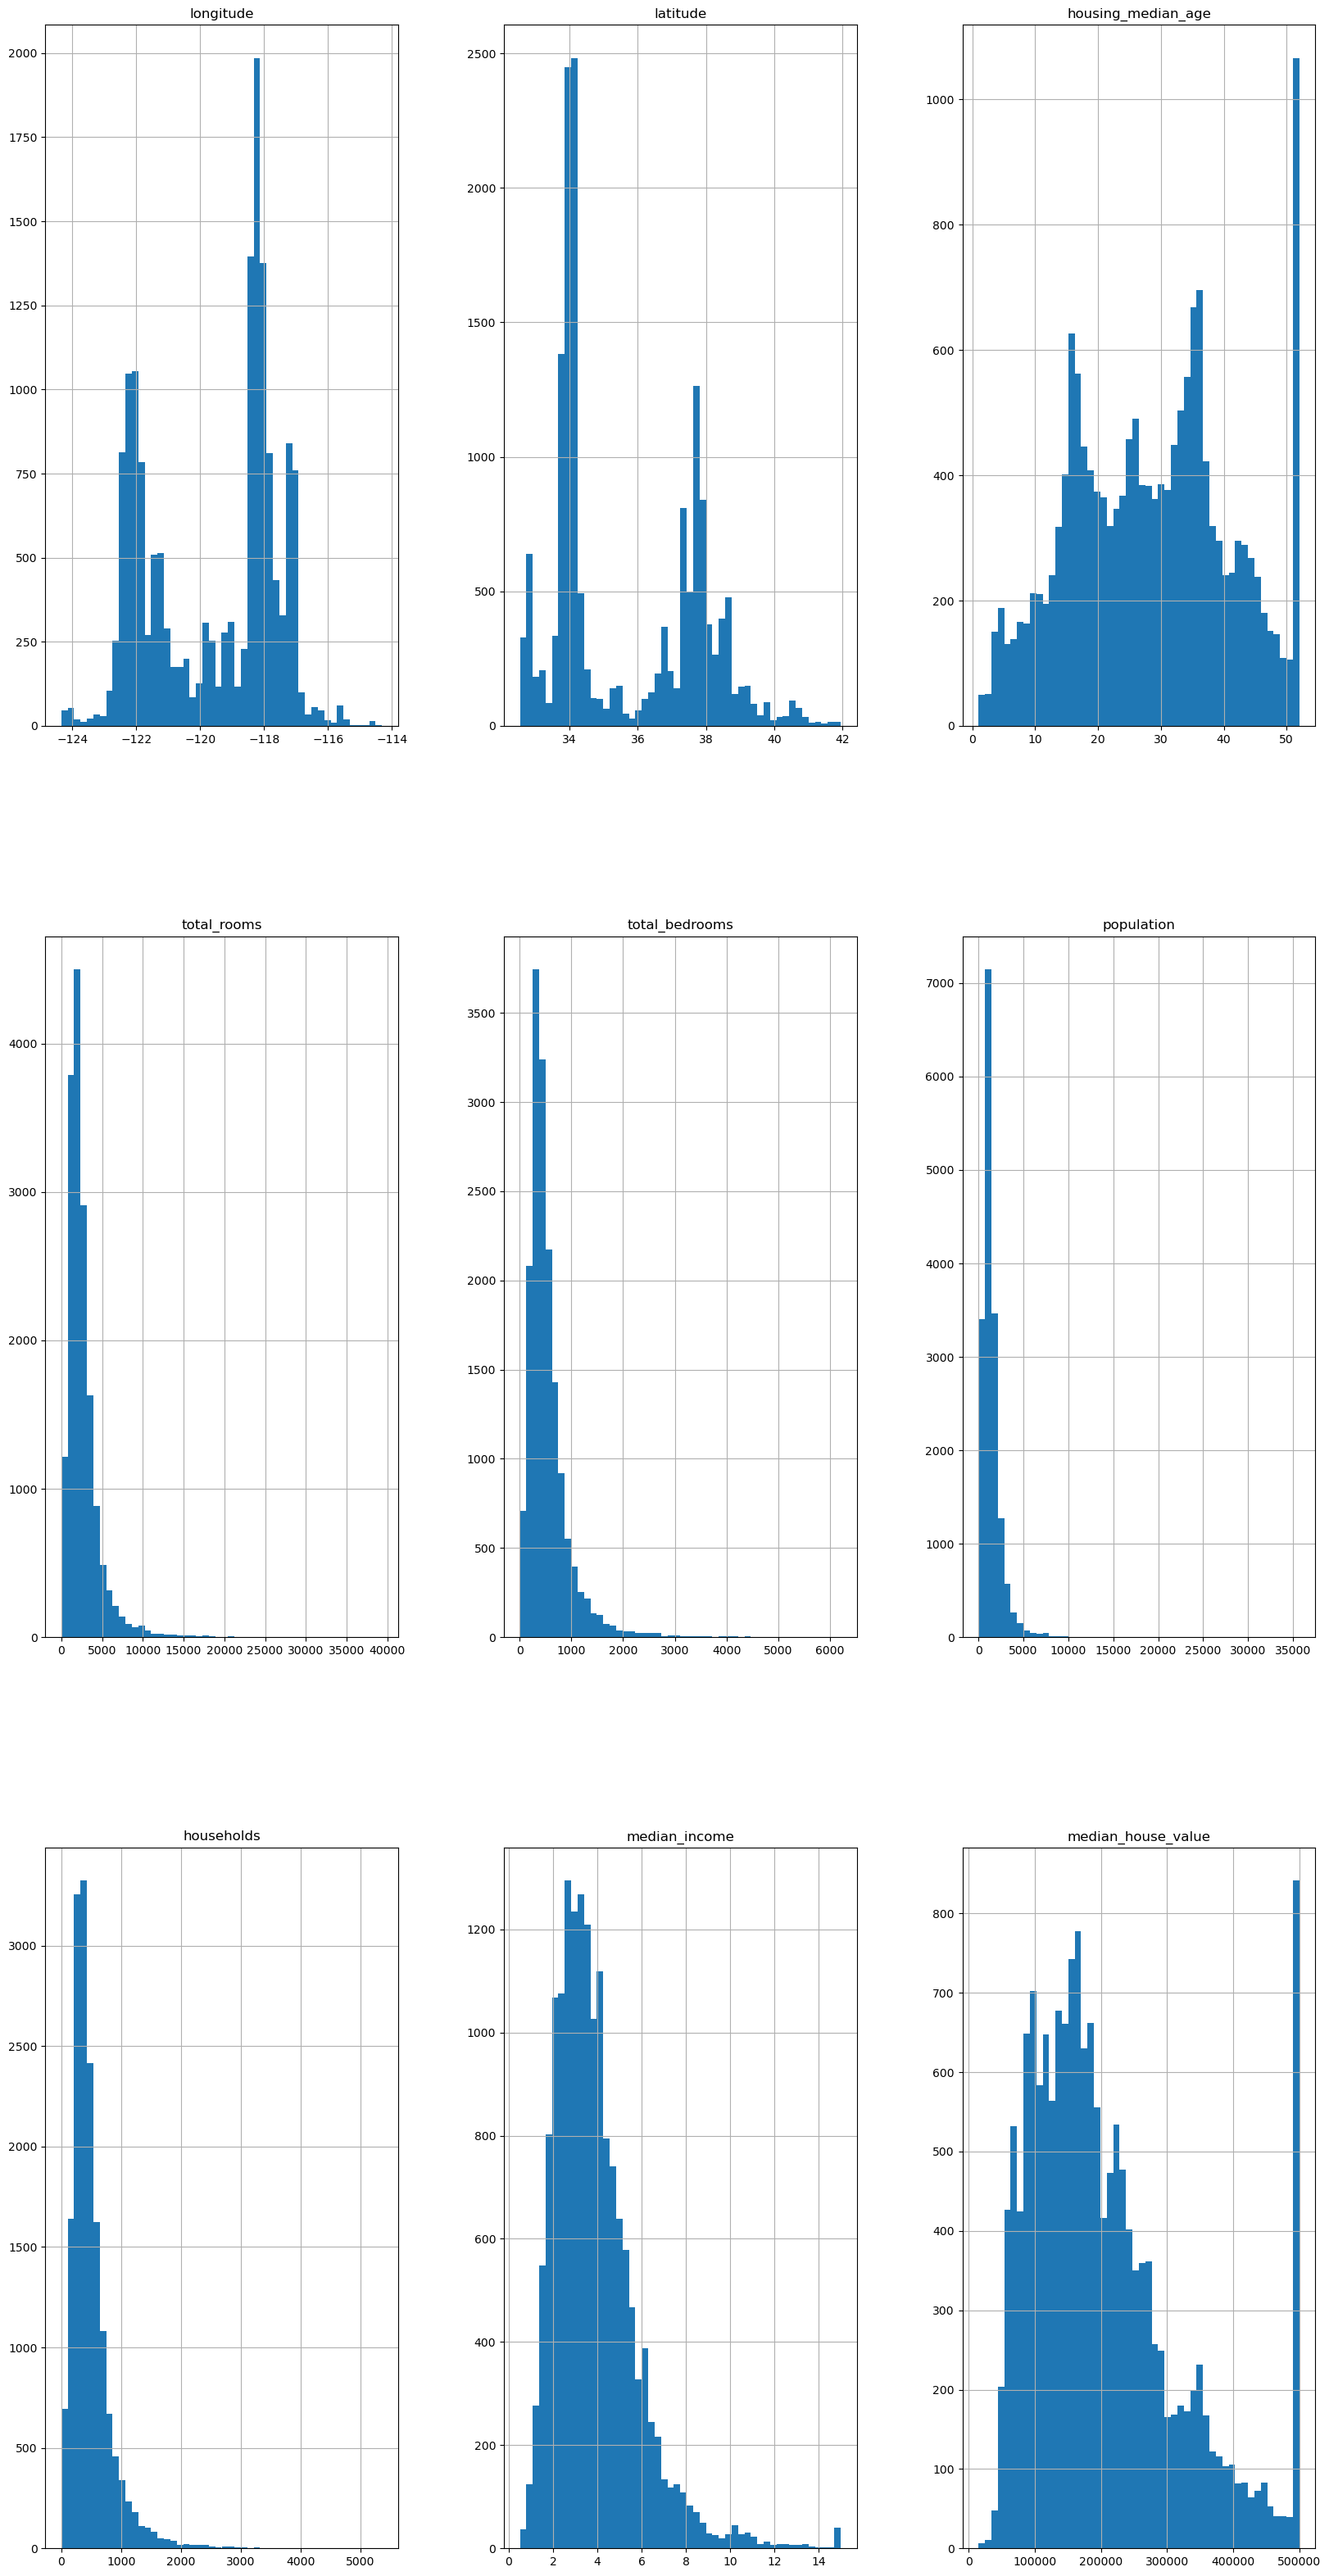

In [19]:
housing = strat_train_set.copy()
housing.hist(bins=50, figsize=(20, 40))

<Axes: >

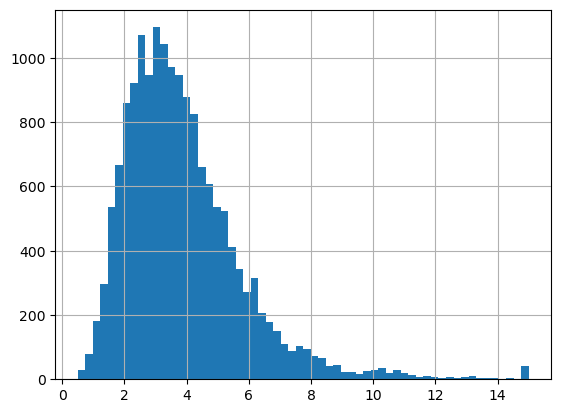

In [20]:
housing['median_income'].hist(bins= 60)

Geographical Distribution

<Axes: xlabel='longitude', ylabel='latitude'>

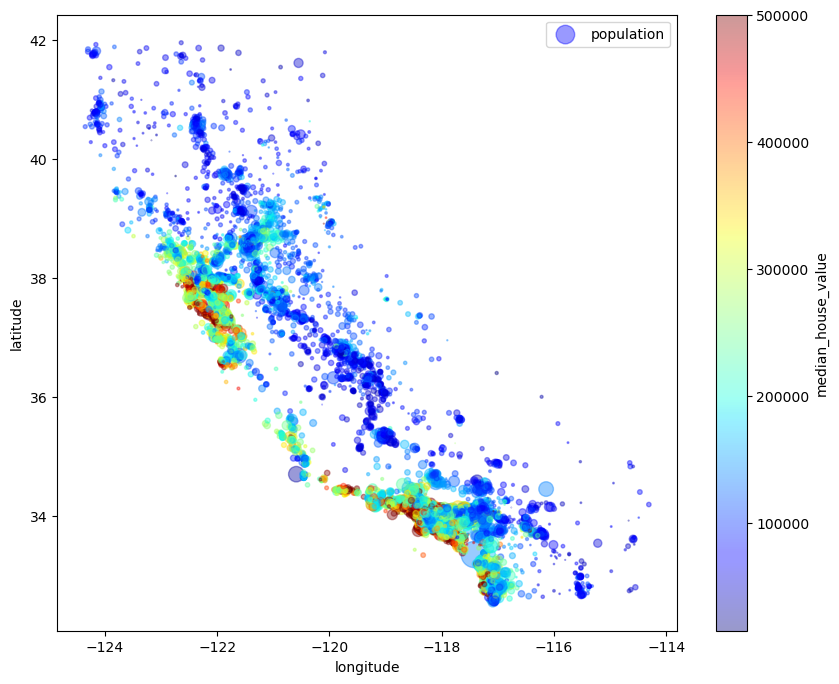

In [21]:
housing.plot(kind='scatter', x = 'longitude', y = 'latitude', alpha = 0.4, s = housing['population']/100, label = 'population', figsize = (10, 8), c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True, sharex = False)

### Corealtion Matrices

In [22]:
housing.corr

<bound method DataFrame.corr of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  

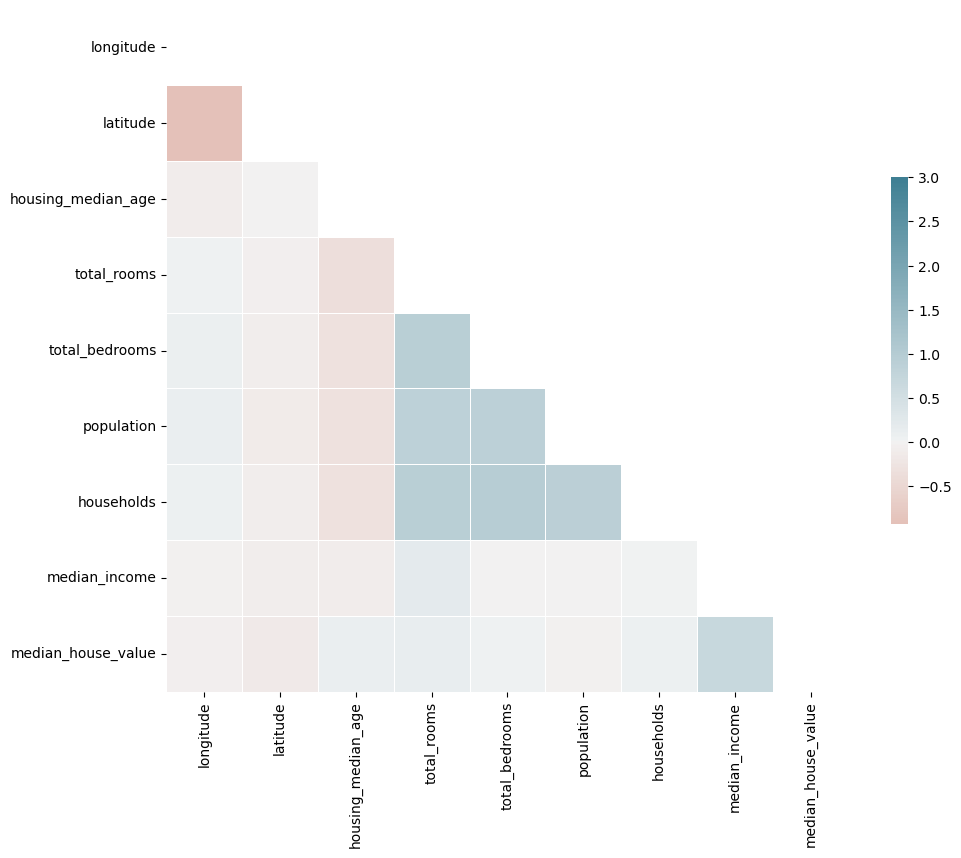

In [23]:
housing_numeric = housing.select_dtypes(include=[np.number]).dropna()

# Calculate the correlation matrix
corr = housing_numeric.corr()

# Create the mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

we see a strong corelation between latitude and longitude, median_income and the median_house_value and the rest which we are not conserned as of now

# Preparing Data for Machine Learning

In [24]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_lables = strat_test_set['median_house_value'].copy()

We will begoing through 4 steps:
1) Feature Engineering
2) Imputation
3) Encoding Categorical Vaariable 
4) Scaling

# Dealing with Missing Value

In [25]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


Option 1) Drop the missing columns
Option 2) Impute the missing value

In [26]:
imputer = SimpleImputer(strategy= 'median')

In [27]:
housing_num = housing.select_dtypes(include=[np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [28]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

So we fit the SimplImputer into our data set. This is the general way of working with sklearn libraries

In [29]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns= housing_num.columns, index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


Reason we transform this to a Data Frame because Sklearn give out numpy arrays which are not cleaner to look at.

In [30]:
imputer.strategy

'median'

## Encode Categorical Variables

In [31]:
housing_cat = housing_data[['ocean_proximity']]
housing_cat.head()


,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


We can use ordinal encoder, when one category is better than the other. But in this case we don't require that so we will use one hot encoder.

In [32]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20640 stored elements and shape (20640, 5)>

# Feature Enginerring

In [33]:
def feature_engineering(data):
    data['room_per_household'] = data['total_bedrooms'] / data['households']
    data['population_per_household'] = data['population'] / data['households']
    data['rooms_per_household'] = data['total_rooms'] / data['households']
    return data

In [34]:
housing_feature_engineering = feature_engineering(housing_num)
housing_feature_engineering


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,room_per_household,population_per_household,rooms_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.128895,3.168555,5.485836
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,1.113281,2.623698,6.927083
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.033333,2.223333,5.393333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,1.074534,1.859213,3.886128
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.113793,3.167241,6.096552
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.229770,2.023976,6.658342
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,1.002821,3.363188,5.571932
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0.965116,2.662791,4.110465
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.157685,2.411178,6.297405


## Scaling our Data

Why we scale our data? 
So we have numerical data in our data set if you have a closer look at the numerical data you will notice that the some numerical value is comparitively greater than the other numerical value. so when we put this data into our machine learning algorithms, the algorithm thinks of it as the higher numerical value are comparitively more important than the smaller ones so to avoid this we scale our data.

In [35]:
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_feature_engineering)
housing_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.05896205,
         0.00622264,  0.01739526],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.02830837,
        -0.04081077,  0.56925554],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.1286475 ,
        -0.07537122, -0.01802432],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.26257303,
        -0.03743619, -0.5092404 ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.11548226,
        -0.05915604,  0.32814891],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.05505203,
         0.00657083,  0.01407228]])

# Pipelines

Pipelines are feature built in sklearn that allows you to stack the different steps. To this time we have applied 1) feature engineering 2) scaling 3) encoding categorical variable 4) imputation not in this particular order 

but for this project, as we are just starting of so we will create a function which will basically will do the exact same thing 

In [36]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_lables = strat_train_set['median_house_value'].copy()

def data_preprocessing(data):
    if 'median_house_value' in data.columns:
        labels = data['median_house_value'].copy()
        data = data.drop('median_house_value', axis=1)
    else:
        labels = None

    # Feature Engineering (assuming feature_engineering is defined elsewhere)
    feature_engineering_data = feature_engineering(data)
    features = list(feature_engineering_data.columns)
    
    # Imputation
    imputer = SimpleImputer(strategy='median')
    housing_num = feature_engineering_data.select_dtypes(include=[np.number])
    housing_num_imputed = imputer.fit_transform(housing_num)
    
    # Encoding Categorical Variables
    housing_cat = feature_engineering_data.select_dtypes(exclude=[np.number])
    cat_encoder = OneHotEncoder()  # Default is True
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove('ocean_proximity')
    
    # Scaling
    scaler = StandardScaler()
    housing_num_scaled = scaler.fit_transform(housing_num_imputed)
    
    # Combine scaled numerical and one-hot encoded categorical data
    output = np.hstack([housing_num_scaled, housing_cat_1hot.toarray()])

    return output, labels, features

train_data, train_labels, features = data_preprocessing(strat_train_set)


The preprocessing of the data is complete now. We will start the Machine learning process now.

In [37]:
train_data, train_labels, features = data_preprocessing(strat_train_set)
train_data

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# Linear Regression

In [38]:
linear_reg = LinearRegression()
linear_reg.fit(train_data, train_labels)

LinearRegression()

What we are trying to do is: we are trying to run the machine learning algorithm in which we are trying to relate how train_data is related to train_model

In [39]:
test_data, test_labels, features = data_preprocessing(strat_test_set)
test_data

array([[ 0.57507019, -0.69657252,  0.0329564 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.43480141, -0.33466769, -0.36298077, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54522177, -0.63547171,  0.58726843, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.08656982, -0.54617051,  1.14158047, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81385757, -0.92687559,  0.11214383, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.49049967, -0.66367208,  0.58726843, ...,  0.        ,
         0.        ,  0.        ]])

In [40]:
original_values = test_labels[:5]
original_values

5241     500001.0
17352    162500.0
3505     204600.0
7777     159700.0
14155    184000.0
Name: median_house_value, dtype: float64

In [41]:
predicted_value = linear_reg.predict(test_data[:5])
predicted_value


array([420224., 287616., 242944., 194048., 262656.])

In [42]:
# Creating the DataFrame correctly
comparison_dataframe = pd.DataFrame({
    "original_values": original_values,
    "predicted_value": predicted_value
})

# Calculating the differences
comparison_dataframe['differences'] = comparison_dataframe['original_values'] - comparison_dataframe['predicted_value']

print(comparison_dataframe)

       original_values  predicted_value  differences
5241          500001.0         420224.0      79777.0
17352         162500.0         287616.0    -125116.0
3505          204600.0         242944.0     -38344.0
7777          159700.0         194048.0     -34348.0
14155         184000.0         262656.0     -78656.0


In [43]:
lin_mse = mean_squared_error(original_values, predicted_value)
lin_mse = np.sqrt(lin_mse)
lin_mse

np.float64(78555.96344135817)

In [44]:
lin_mae = mean_absolute_error(original_values, predicted_value)
lin_mae

np.float64(71248.2)

# Decison Tree Regression

In [45]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_data, train_labels)
train_prediction = tree_reg.predict(train_data)
train_mse = mean_squared_error(train_labels, train_prediction)
train_rmse = np.sqrt(train_mse)
train_rmse

np.float64(0.0)

## The output comes out to be 0 hence we get that something is not right, so we will do cross-validation

In [46]:
scores = cross_val_score(tree_reg, train_data, train_labels, scoring= 'neg_mean_squared_error', cv=10)
train_rmse_score = np.sqrt(-scores)
train_rmse_score

array([70819.83674558, 70585.09139446, 69861.50467212, 73083.46385442,
       66246.62162221, 74093.76616605, 77298.21284135, 70265.05374821,
       70413.46481703, 72693.02785945])

# Random Forest Regressor


Bunch of Decision Tree Regressor runned over and over again

In [47]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_data, train_labels)
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(18797.81343373367)

In [48]:
scores = cross_val_score(linear_reg, train_data, train_labels, scoring= 'neg_mean_squared_error', cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69178.524212
std       2428.184141
min      64914.420793
25%      67457.807525
50%      69290.322836
75%      70503.784312
max      72787.893450
dtype: float64

# Fine Tunning the Model

After picking the model or setting the model that is promissing, we will need to fine-tune the hyperparameters (parameters of the models that aren't affected by training) in order to find the best parameter to use for the model. We will use grid search in order to accomplish this.

In [49]:
param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},

]
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring= 'neg_mean_squared_error', return_train_score= True)
grid_search.fit(train_data, train_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [50]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [51]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

Tells us that Random forest is the best, use 6 features, and n_estimator should be 30

Now we will run our cross validation using these param

In [52]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64441.33583774864 {'max_features': 2, 'n_estimators': 3}
55009.8252818043 {'max_features': 2, 'n_estimators': 10}
52758.77220386766 {'max_features': 2, 'n_estimators': 30}
60419.95105027927 {'max_features': 4, 'n_estimators': 3}
52606.363500592684 {'max_features': 4, 'n_estimators': 10}
50494.21394343413 {'max_features': 4, 'n_estimators': 30}
58658.87553276854 {'max_features': 6, 'n_estimators': 3}
51688.259845013825 {'max_features': 6, 'n_estimators': 10}
49602.83903888296 {'max_features': 6, 'n_estimators': 30}
57764.545176887186 {'max_features': 8, 'n_estimators': 3}
51906.606161086886 {'max_features': 8, 'n_estimators': 10}
49851.77165193962 {'max_features': 8, 'n_estimators': 30}
63137.43571927858 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54419.40582754731 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58195.29390064867 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52168.74519952844 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [53]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.042278,0.001576,0.001958,0.000174,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.094088e+09,-3.701893e+09,...,-4.152686e+09,2.564139e+08,18,-1.120130e+09,-1.095790e+09,-1.132094e+09,-1.176269e+09,-1.121152e+09,-1.129087e+09,2.640853e+07
1,0.146237,0.008843,0.005935,0.000144,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.969681e+09,-2.920099e+09,...,-3.026081e+09,9.523513e+07,11,-5.756282e+08,-5.732697e+08,-5.938710e+08,-5.909882e+08,-5.970375e+08,-5.861589e+08,9.779263e+06
2,0.420921,0.009499,0.017430,0.000645,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.759166e+09,-2.695824e+09,...,-2.783488e+09,9.776798e+07,9,-4.355932e+08,-4.372516e+08,-4.354431e+08,-4.348115e+08,-4.407693e+08,-4.367737e+08,2.154413e+06
3,0.071917,0.001604,0.001898,0.000053,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.739305e+09,-3.453554e+09,...,-3.650570e+09,1.567023e+08,16,-1.033917e+09,-1.025859e+09,-9.509278e+08,-9.789355e+08,-9.988662e+08,-9.977011e+08,3.048182e+07
4,0.234623,0.003439,0.005895,0.000246,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.774614e+09,-2.715229e+09,...,-2.767429e+09,1.076429e+08,8,-5.106846e+08,-5.406298e+08,-4.993756e+08,-5.253607e+08,-5.336332e+08,-5.219368e+08,1.505709e+07
5,0.723471,0.018747,0.017483,0.000637,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.558975e+09,-2.443052e+09,...,-2.549666e+09,1.019596e+08,3,-3.851322e+08,-3.974866e+08,-3.843839e+08,-3.882619e+08,-3.934907e+08,-3.897511e+08,5.023580e+06
6,0.095590,0.000908,0.001863,0.000138,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.590876e+09,-3.341284e+09,...,-3.440864e+09,1.044087e+08,14,-9.127519e+08,-9.396161e+08,-8.570217e+08,-9.053142e+08,-9.165255e+08,-9.062459e+08,2.714946e+07
7,0.335046,0.004412,0.005958,0.000159,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.723446e+09,-2.593712e+09,...,-2.671676e+09,1.309912e+08,4,-4.900412e+08,-5.171047e+08,-4.779660e+08,-4.969112e+08,-5.094824e+08,-4.983011e+08,1.387280e+07
8,1.007789,0.011170,0.017095,0.000154,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.472257e+09,-2.369335e+09,...,-2.460442e+09,9.252659e+07,1,-3.740409e+08,-3.831060e+08,-3.835964e+08,-3.687507e+08,-3.818289e+08,-3.782646e+08,5.880922e+06
9,0.131059,0.002974,0.001906,0.000050,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.344547e+09,-3.154085e+09,...,-3.336743e+09,9.768474e+07,12,-8.541704e+08,-9.124260e+08,-9.442119e+08,-8.793192e+08,-8.832932e+08,-8.946842e+08,3.090299e+07


# Randomized Search

Since grid search, searches all the parameters it can take a long time to run when there are too many parameters to deal with.

Randomized Search allows you to more easily find the hyperparameters that we are interested in because instead of searching all possible combinations, it randomly pics the couple and try thoes out.

In [56]:
params_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high = 8),
}
forest_reg = RandomForestRegressor(random_state=42)
rand_search = RandomizedSearchCV(forest_reg, param_distributions=params_distribs, n_iter=10, cv=5, scoring= 'neg_mean_squared_error', random_state= 42)
rand_search.fit(train_data, train_labels)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x169a32990>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x169a33bc0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [57]:
cvres = rand_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)


48883.53629011628 {'max_features': 7, 'n_estimators': 180}
51634.61963021687 {'max_features': 5, 'n_estimators': 15}
50302.02033084696 {'max_features': 3, 'n_estimators': 72}
50952.54821857023 {'max_features': 5, 'n_estimators': 21}
49063.34454115586 {'max_features': 7, 'n_estimators': 122}
50307.484693492996 {'max_features': 3, 'n_estimators': 75}
50165.36256025555 {'max_features': 3, 'n_estimators': 88}
49251.93799470358 {'max_features': 5, 'n_estimators': 100}
50046.040926138194 {'max_features': 3, 'n_estimators': 150}
64847.94779269648 {'max_features': 5, 'n_estimators': 2}


In [58]:
features_importance  = grid_search.best_estimator_.feature_importances_
features_importance

array([8.46978272e-02, 7.69983975e-02, 4.08715796e-02, 1.67325719e-02,
       1.71418340e-02, 1.73518185e-02, 1.56303531e-02, 3.39824215e-01,
       2.30528104e-02, 1.04033701e-01, 8.64983594e-02, 1.29273143e-02,
       1.54663950e-01, 7.22217547e-05, 3.62205279e-03, 5.88099358e-03])

# Feature Important List

Judging the inportance of a feature is very important as this allows us to explain our stackeholders which feature is more important and why which feature is becoming more important as more advance models behaves like a black box

In [60]:
features_importance_list = list(zip(features, features_importance.tolist()))
features_importance_list

[('longitude', 0.08469782719652269),
 ('latitude', 0.07699839747855736),
 ('housing_median_age', 0.040871579612884096),
 ('total_rooms', 0.016732571900462085),
 ('total_bedrooms', 0.017141833991840584),
 ('population', 0.017351818472104607),
 ('households', 0.015630353131298083),
 ('median_income', 0.3398242154869637),
 ('room_per_household', 0.023052810363875926),
 ('population_per_household', 0.10403370064780086),
 ('rooms_per_household', 0.08649835942626649),
 ('<1H OCEAN', 0.012927314349565637),
 ('INLAND', 0.15466394981681342),
 ('ISLAND', 7.222175467748093e-05),
 ('NEAR BAY', 0.0036220527944330365),
 ('NEAR OCEAN', 0.005880993575933965)]

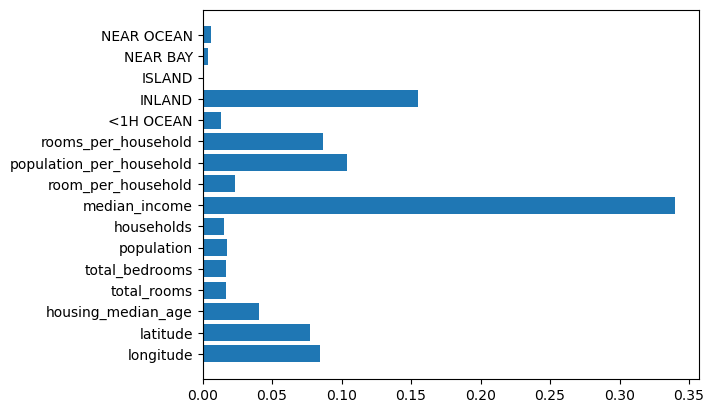

In [63]:
plt.barh(y= features, width=features_importance.tolist())
plt.show()

This tells us that how different feautres plays a role for predicting the value

median income is the most important predictor

In [64]:
final_model = grid_search.best_estimator_
final_prediction = final_model.predict(test_data)
final_mse = mean_squared_error(test_labels, final_prediction)
final_rmse = np.sqrt(final_mse)
final_rmse

np.float64(63301.179203602675)

# Summary

In this project, I carried out a comprehensive data analysis and machine learning pipeline, which involved the following steps:

1) Data Acquisition and Exploration:

1.1) Data Collection: We gathered the necessary data for our analysis.
1.2) Data Information: We explored the dataset to understand its structure, types of features, and basic statistics.

2) Initial Data Inspection:

2.1) Focused Data Examination: We looked closely at particular subsets of the data, including key variables of interest.
2.2) Income Category Analysis: We specifically examined the income categories within the dataset.

3) Data Splitting:

3.1) Train-Test Split: The dataset was divided into training and testing sets to evaluate model performance.
3.2) Stratified Sampling: We used stratified sampling based on the income category to ensure representative splits.

4) Data Visualization:

4.1) Visualizing Distributions and Relationships: We created various plots to visualize the data, helping us understand distributions and potential correlations.
5) Correlation Analysis:

5.1) Correlation Matrices: We calculated and visualized correlation matrices to identify relationships between variables.

6) Data Preparation:

6.1) Feature Engineering: We engineered new features to enhance the predictive power of our models.
6.2) Imputation: Missing values were handled using appropriate imputation techniques.
6.3) Scaling: Numeric features were scaled to ensure uniformity in model training.
6.4) Encoding Categorical Variables: Categorical variables were encoded to make them suitable for model input.

7) Pipeline Creation:

7.1) Function-Based Pipelines: We developed data preparation pipelines encapsulated in functions for reproducibility and ease of use.

8) Model Selection and Training:

8.1) Model Training: Various models were selected and trained on the prepared data.
8.2) Linear Regression: We performed linear regression as a baseline model.

9) Model Evaluation:

9.1) Performance Metrics: We used appropriate metrics to evaluate and compare model performance.
9.2) Cross-Validation: Cross-validation was employed to assess model stability and performance across different subsets of the data.

10) Advanced Modeling:

10.1) Random Forest Regressor: We trained a Random Forest Regressor to capture complex patterns in the data.

11) Hyperparameter Optimization:

11.1) Randomized Search: We performed hyperparameter optimization using randomized search to enhance model performance.
11.2) Feature Importance: We generated a list of feature importances to understand the most influential variables in our model.

12) Final Model and Prediction:

12.1) Final Model Selection: Based on performance metrics and cross-validation results, we selected the final model.
12.2) Prediction: The final model was used to make predictions on the test data, providing the final output values. 